In [4]:
import urllib.request

fp = urllib.request.urlopen("ftp://ftp.ensembl.org/pub/release-99/regulation/homo_sapiens/Peaks/")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

data = mystr.split("\n")
cellDict = {}

In [5]:
for item in data:
    if item != "" and item != "\n":
        cell = item.split(" ")[-1][:-1]
        cellDict[cell] = []
        fp = urllib.request.urlopen("ftp://ftp.ensembl.org/pub/release-99/regulation/homo_sapiens/Peaks/"+cell+"/")
        mybytes = fp.read()
        mystr = mybytes.decode("utf8")
        fp.close()
        
        data2 = mystr.split("\n")
        for item in data2:
            item = item.split(" ")[-1][:-1]
            
            cellDict[cell].append(item)
        
        

In [6]:
for item in cellDict:
    print(item, cellDict[item])
    

A549 ['BCL3', 'BHLHE40', 'CEBPB', 'CTCF', 'E2F6', 'ELK1', 'EP300', 'ESRRA', 'FOSL2', 'GATA3', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'HDAC2', 'JUN', 'Junb', 'KDM1A', 'KDM5A', 'MAFK', 'MYC', 'Max', 'NFE2L2', 'NR3C1', 'Pbx3', 'REST', 'RFX5', 'RNF2', 'Rad21', 'SIN3A', 'SREBF1', 'SREBF2', 'TEAD4', 'USF2', 'ZC3H11A', '']
A673 ['CTCF', 'DNase1', 'EZH2', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
B ['CTCF', 'DNase1', 'EZH2', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
B_PB ['DNase1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
CD14_monocyte_1 ['CTCF', 'DNase1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K9ac', 'H3K9me3', 'H4K20me1', '']
CD14_monocyte_PB ['DNase1', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3', '']
CD38__naive_B_CB ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K9me3', '']
CD38__naive_B_VB ['H3K27me3', 'H3K36me3', 'H3K4me1',

In [7]:


#to know the full HM to create dictionaries
hmList = []
for cell in cellDict:
    for item in cellDict[cell]:
        if item != "":
            if "H1" == item[:2] or "H2" == item[:2] or "H3" == item[:2] or "H4" == item[:2]:
                if item not in hmList:
                    hmList.append(item)
                    
for hm in hmList:
    print("\t\""+hm.lower()+"\":False")
            
            

	"h3k27ac":False
	"h3k27me3":False
	"h3k36me3":False
	"h3k4me1":False
	"h3k4me3":False
	"h3k9me3":False
	"h3k4me2":False
	"h3k9ac":False
	"h4k20me1":False
	"h2ak5ac":False
	"h2bk120ac":False
	"h2bk12ac":False
	"h2bk15ac":False
	"h2bk20ac":False
	"h2bk5ac":False
	"h3k14ac":False
	"h3k18ac":False
	"h3k23ac":False
	"h3k23me2":False
	"h3k4ac":False
	"h3k56ac":False
	"h3k79me1":False
	"h3k79me2":False
	"h4k5ac":False
	"h4k8ac":False
	"h4k91ac":False
	"h2az":False
	"h3k9me1":False
	"h2ak9ac":False
	"h2a.zac":False
	"h4k12ac":False


In [72]:

finalDict = {}
for cell in cellDict:
    finalDict[cell] = {
        "dnase1": 0, 
        "h3k27ac":0,
        "h3k27me3":0,
        "h3k36me3":0,
        "h3k4me1":0,
        "h3k4me3":0,
        "h3k9me3":0,
        "h3k4me2":0,
        "h3k9ac":0,
        "h4k20me1":0,
        "h2ak5ac":0,
        "h2bk120ac":0,
        "h2bk12ac":0,
        "h2bk15ac":0,
        "h2bk20ac":0,
        "h2bk5ac":0,
        "h3k14ac":0,
        "h3k18ac":0,
        "h3k23ac":0,
        "h3k23me2":0,
        "h3k4ac":0,
        "h3k56ac":0,
        "h3k79me1":0,
        "h3k79me2":0,
        "h4k5ac":0,
        "h4k8ac":0,
        "h4k91ac":0,
        "h2az":0,
        "h3k9me1":0,
        "h2ak9ac":0,
        "h2a.zac":0,
        "h4k12ac":0,
        "ezh2":0,
        "yy1":0, 
        "ctcf":0, 
        "ep300":0, 
        "crebbp":0}#,
#        "TFs": 0}
    for item in cellDict[cell]:
        if item != "" and "pol" not in item.lower():
                if item.lower() in finalDict[cell]:
                    finalDict[cell][item.lower()] = 1
#                else:
#                    finalDict[cell]["TFs"] += 1
            


In [73]:
import pandas as pd
df = pd.DataFrame.from_dict(finalDict)
df2 = df.transpose()
df2.to_csv("data_ensembl.tsv", sep="\t")

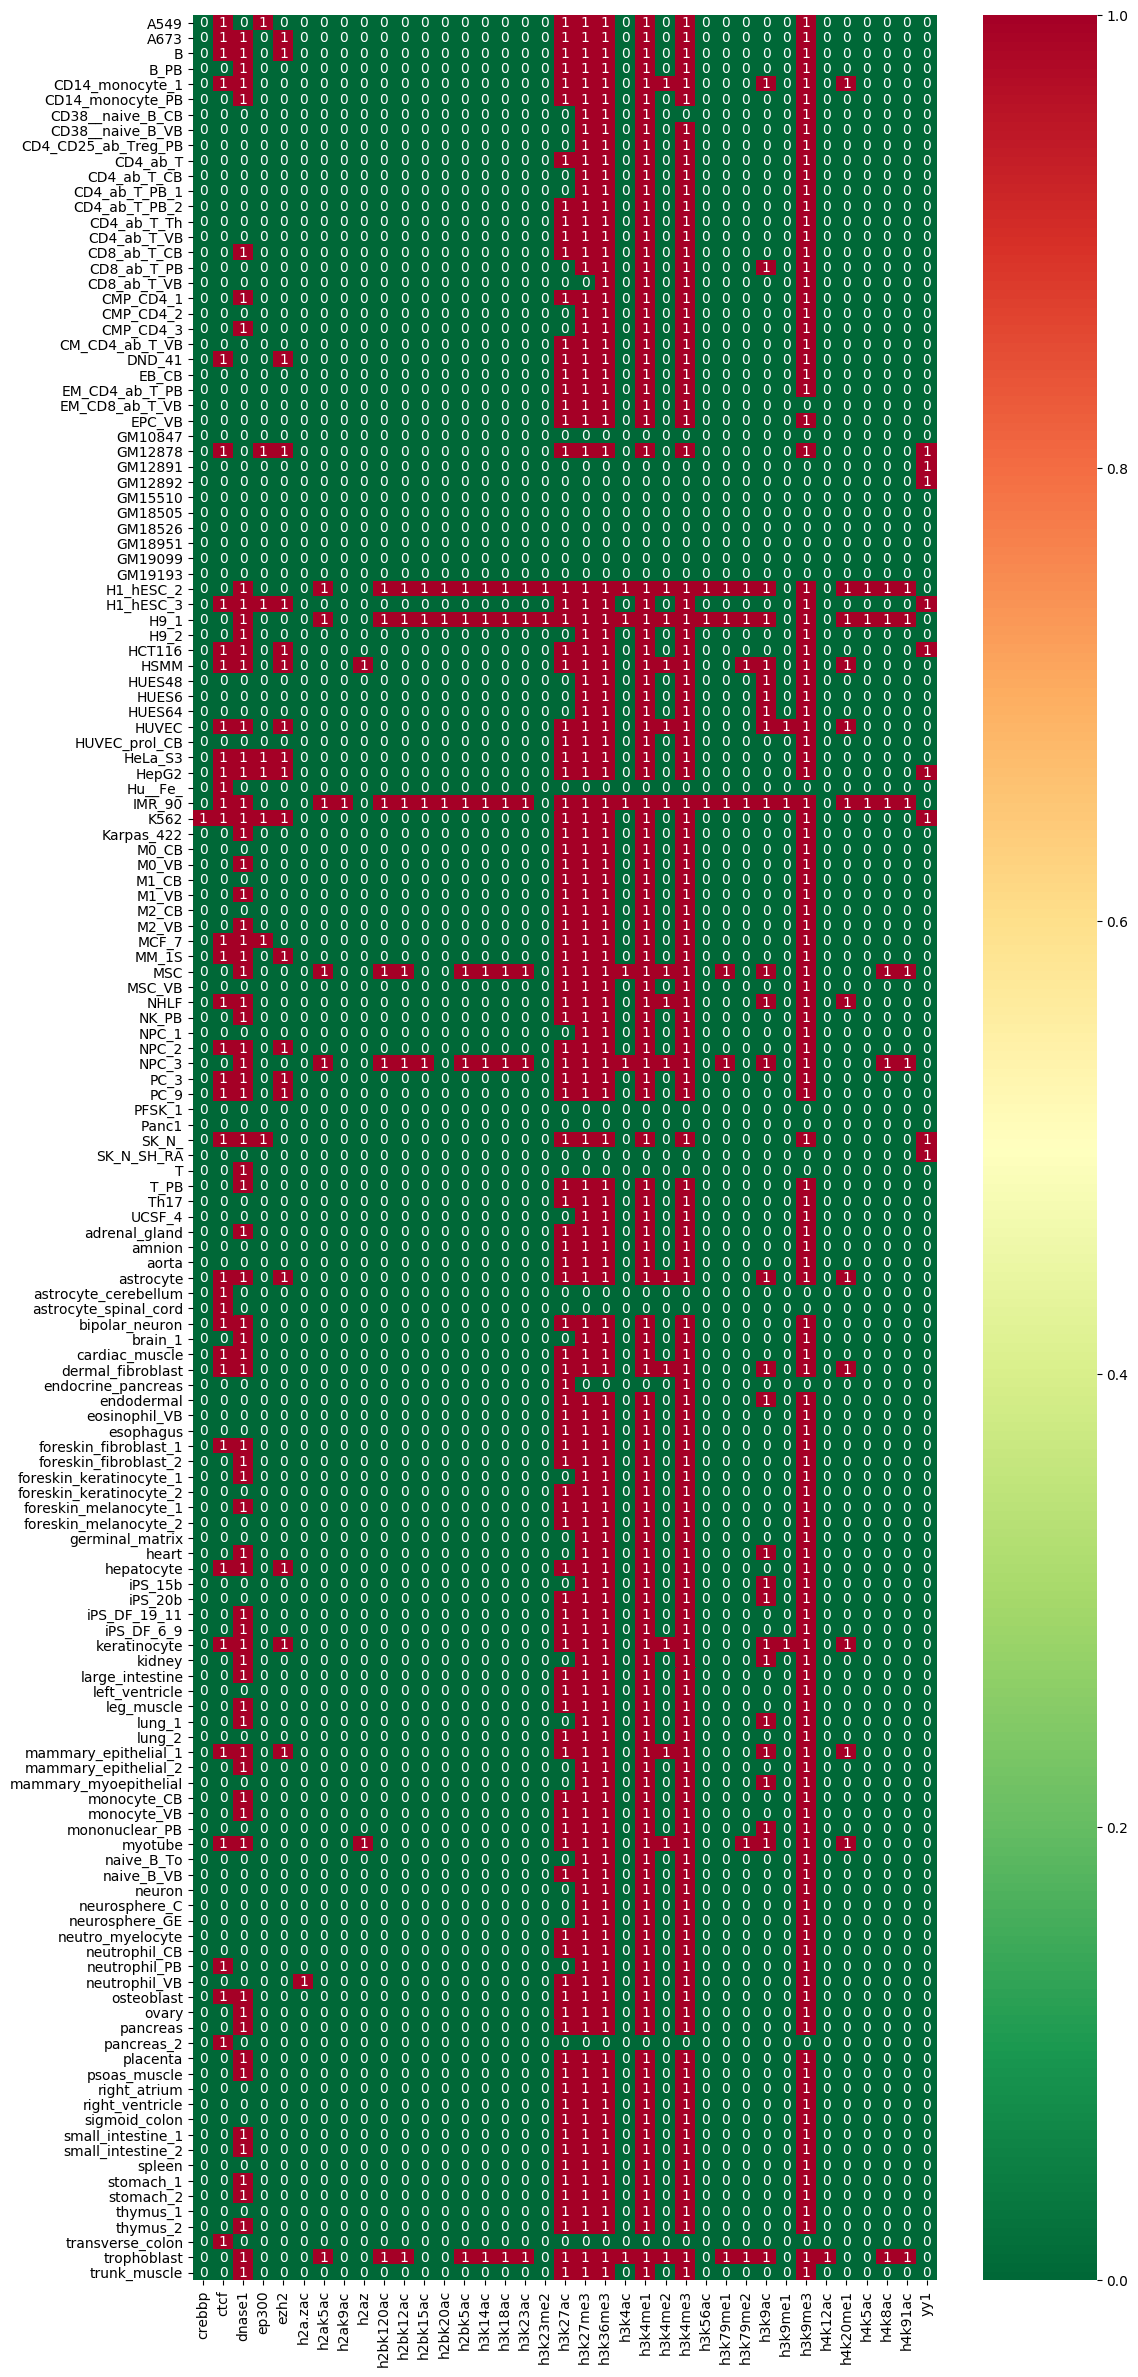

In [74]:
import seaborn as sns
%matplotlib inline



factor = 2
fig, ax = plt.subplots(1, 1, figsize = (4*3, 3*10), dpi = 100)

sns.heatmap(df2, cmap='RdYlGn_r', annot=True, ax = ax)
# fig = sns_plot.get_figure()
# fig.savefig("output.svg",  format='svg', dpi=1200, bbox_to_anchor = 'tight')
plt.show()

In [75]:
#looping over the dataframe to know wich celltypes have most common histone marks, dnase, ctcf and yy1
import numpy as np
colNames = ["dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf","yy1"]

indexNames = list(df2.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df2[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1:
        print(iName)

    

#h3k4ac
#h3k9ac
#h4k20me1

H1_hESC_3
HCT116
HepG2
K562
SK_N_


In [76]:
import numpy as np
colNames = ["ep300","dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf","yy1"]

indexNames = list(df2.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df2[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1:
        print(iName)

H1_hESC_3
HepG2
K562
SK_N_


In [77]:
colNames = ["dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf","yy1"]

indexNames = list(df2.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df2[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1:
        print(iName)

H1_hESC_3
HCT116
HepG2
K562
SK_N_


In [78]:
colNames = ["dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf"]

indexNames = list(df2.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df2[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1:
        print(iName)

A673
B
CD14_monocyte_1
H1_hESC_3
HCT116
HSMM
HUVEC
HeLa_S3
HepG2
IMR_90
K562
MCF_7
MM_1S
NHLF
NPC_2
PC_3
PC_9
SK_N_
astrocyte
bipolar_neuron
cardiac_muscle
dermal_fibroblast
foreskin_fibroblast_1
hepatocyte
keratinocyte
mammary_epithelial_1
myotube
osteoblast


In [79]:
finalDict2 = {}
for cell in cellDict:
    finalDict2[cell] = {
        "dnase1": 0, 
        "h3k27ac":0,
        "h3k27me3":0,
        "h3k36me3":0,
        "h3k4me1":0,
        "h3k4me3":0,
        "h3k9me3":0,
        "h3k4me2":0,
        "h3k9ac":0,
        "h4k20me1":0,
        "h2ak5ac":0,
        "h2bk120ac":0,
        "h2bk12ac":0,
        "h2bk15ac":0,
        "h2bk20ac":0,
        "h2bk5ac":0,
        "h3k14ac":0,
        "h3k18ac":0,
        "h3k23ac":0,
        "h3k23me2":0,
        "h3k4ac":0,
        "h3k56ac":0,
        "h3k79me1":0,
        "h3k79me2":0,
        "h4k5ac":0,
        "h4k8ac":0,
        "h4k91ac":0,
        "h2az":0,
        "h3k9me1":0,
        "h2ak9ac":0,
        "h2a.zac":0,
        "h4k12ac":0,
        "ezh2":0,
        "yy1":0, 
        "ctcf":0, 
        "ep300":0, 
        "crebbp":0,
        "TFs": 0}
    for item in cellDict[cell]:
        if item != "" and "pol" not in item.lower():
                if item.lower() in finalDict[cell]:
                    finalDict2[cell][item.lower()] = 1
                else:
                    finalDict2[cell]["TFs"] += 1

In [80]:
df3 = pd.DataFrame.from_dict(finalDict2)
df4 = df3.transpose()

colNames = ["ep300","dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf","yy1"]

indexNames = list(df4.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df4[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1 and df4["TFs"][iName]>0:
        print(iName, "tfs="+str(df4["TFs"][iName]))


H1_hESC_3 tfs=42
HepG2 tfs=74
K562 tfs=144
SK_N_ tfs=23


In [81]:
colNames = ["dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf","yy1"]

indexNames = list(df4.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df4[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1 and df4["TFs"][iName]>0:
        print(iName, "tfs="+str(df4["TFs"][iName]))

H1_hESC_3 tfs=42
HCT116 tfs=17
HepG2 tfs=74
K562 tfs=144
SK_N_ tfs=23


In [82]:
colNames = ["dnase1","h3k27ac","h3k27me3","h3k36me3","h3k4me1","h3k4me3","h3k9me3","ctcf"]

indexNames = list(df4.index)

for iName in indexNames:
    avgList = []
    for cName in colNames:
        avgList.append(df4[cName][iName])
    x = np.array(avgList)
    if  np.mean(x)== 1 and df4["TFs"][iName]>0:
        print(iName, "tfs="+str(df4["TFs"][iName]))

H1_hESC_3 tfs=42
HCT116 tfs=17
HUVEC tfs=5
HeLa_S3 tfs=40
HepG2 tfs=74
IMR_90 tfs=9
K562 tfs=144
MCF_7 tfs=59
SK_N_ tfs=23


In [84]:
"""date: jan 27, 2020"""

'date: jan 27, 2020'